## Load dataset

In [1]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

data_path = '/Users/farida/Documents/360-bachground-removal/3DSceneGraph_medium/automated_graph/'
data = []

for building in os.listdir(data_path):

    if os.path.isfile(os.path.join(data_path, building)):
        data.append(np.load(data_path+building, allow_pickle=True)['output'].item())
        
print('The number of buildings = ', len(data))

The number of buildings =  105


## Load and visualize the data for a building

In [2]:
print('Each building has the following features:/n')

for key, feature in data[3].items():
    print('The number of elemnts in a/an {} = '.format(key), len(feature))
    

Each building has the following features:/n
The number of elemnts in a/an building =  13
The number of elemnts in a/an room =  16
The number of elemnts in a/an object =  94
The number of elemnts in a/an camera =  59
The number of elemnts in a/an panorama =  59


### Sum all the annotated images for a building

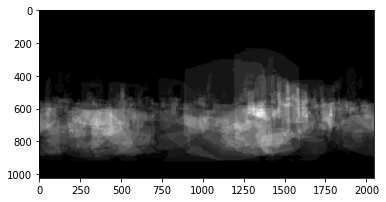

In [5]:
res = np.zeros_like(data[0]['panorama']['p000001']['object_instance'])#, dtype=np.int16)
building_no = 2
s = 'p0000'

for i in range(len(data[building_no]['panorama'])):
    if i < 9:
        name = s + '0' + str(i+1)
    else:
        name = s + str(i+1)
    
    img = data[building_no]['panorama'][name]['object_instance']
    cv2.addWeighted(res, 1.0, np.array(img), 1.0, 0, res)
    
imgplot = plt.imshow(res, cmap='gray')

In [6]:
print('The number of elements for a building = ', len(data[0]))
print('The number of elements for an object = ', len(data[0]['object']))
print('The number of elements for panoramic images = ', len(data[0]['panorama']))
print('The number of elements for a camera = ', len(data[0]['camera']))
print('The number of elements for a room = ', len(data[0]['room']))


The number of elements for a building =  5
The number of elements for an object =  98
The number of elements for panoramic images =  76
The number of elements for a camera =  76
The number of elements for a room =  25
